#### Prerequesites for SVD

**Rectangular matrices** can act as operators for:
- Getting rid of one or more dimensions 
> $$
    \left[\begin{array}{lll}
    1 & 0 & 0 \\
    0 & 1 & 0
    \end{array}\right]\left[\begin{array}{l}
    1 \\
    2 \\
    7
    \end{array}\right]=\left[\begin{array}{l}
    1 \\
    2
    \end{array}\right] \text{(e.g. 3d to 2d)}
> $$ 
- Inroduce a new or several new dimensions
> $$
    \left[\begin{array}{ll}
    1 & 0 \\
    0 & 1 \\
    0 & 0
    \end{array}\right]\left[\begin{array}{l}
    3 \\
    6
    \end{array}\right]=\left[\begin{array}{l}
    3 \\
    6 \\
    0
    \end{array}\right] \text{(e.g. 2d to 3d)}
> $$

**Symmetrical matrices** that we can get from $A\times A^T$, where $A$ is any matrix. Symmetrical matrices have eigenvectors that are perpendicular to each other. Normalizing them yiels an **orthogonal matrix**. Transposing them allows alignement with the standard basis (XYZ starter coordinates). Orthogonal matrix is the matrix that has a property of $A^T\times A=A\times A^T=I$ and is used for unitary transformations, i.e. preservation of inner product in the initial matrix, i.e. any kinds of rotations. 

Rectangular matrices do not have matching $AA^T$ and $A^TA$, so they are denoted as $S_L$ and $S_R$ accordingly. Eigenvectors of each are called left and right singular vectors of $A$:
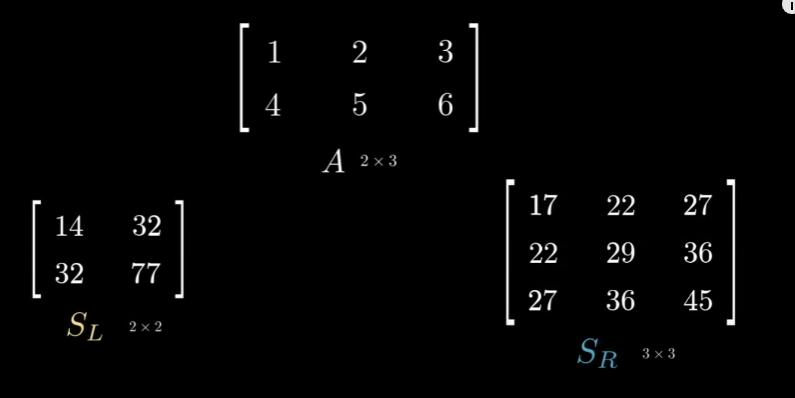

$S_L$ and $S_R$ also display following properties:
- sorted eigenvalues (magnitutes of eigen vectors, that are responsible for linear transformations) in the descending order are equal to each other. All other singular values that are left out are bound to be $0$ (as seen below)
- all eigenvalues values are non-negative (bc both $S$ matrices are PSD)

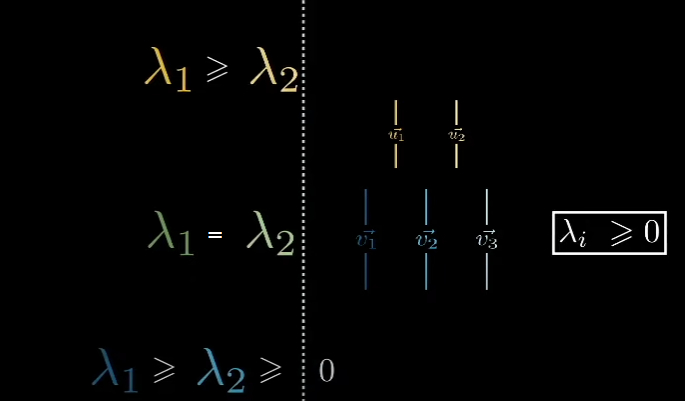

**Singular values** are square roots of previously calculated eigenvalues

#### SVD applications
SVD claims that any matrix can be decomposed into three matrices sequentially:
* $U$ - $S_L$. This matrix aligns the basis (which in the exmaple of 3d->2d would be just the starter XY vectors in $(0,0)$) of following transformatons with $S_L$
* $\sum$ - diagonal matrix of singular values (as seen on the figure below other empty entries are zeros). First it reduces the number of dimensions (since it only keeps singular values of the smallest $S$ matrix) and then stretches the matrix by corresponding diagonal singular values
*  $V^T$ - $S_R$. This matrix rotates the figure into stadard basis

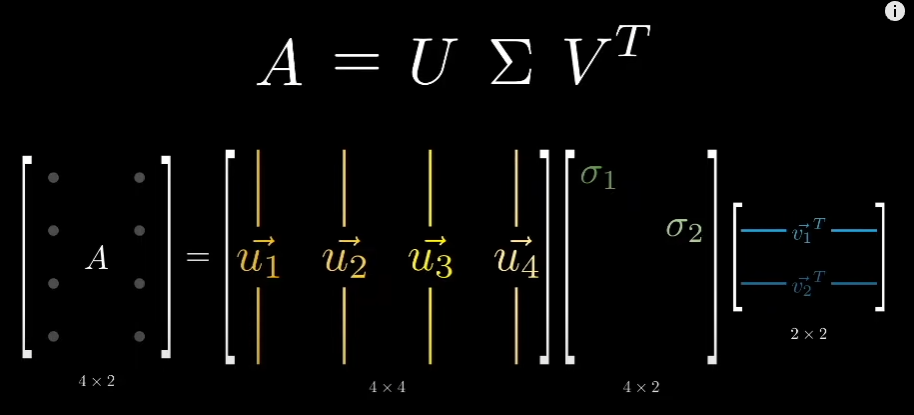

i.e. any matrix can undergo a linear transformation of rotation, scaling and rotation again in a way, so it can become itself again

#### Matrix approximations and image compression

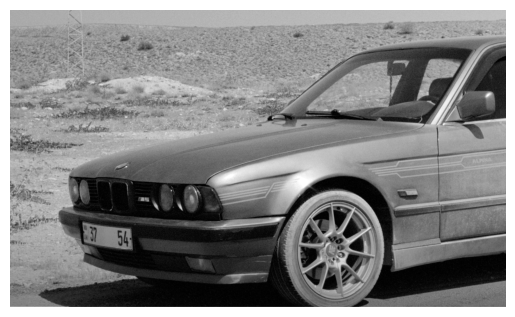

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

A = imread('car.png')
X = np.mean(A, -1) # getting mean over all 3 rgb dims, i.e. converting to grayscale
plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

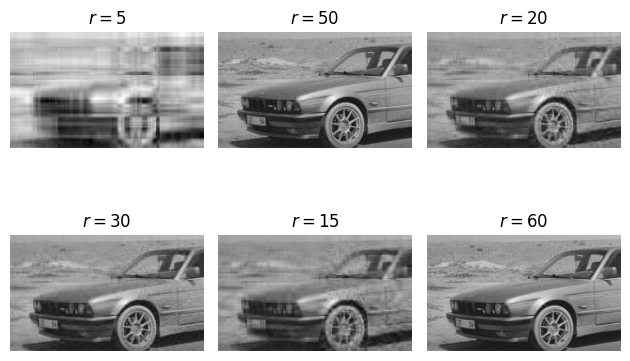

In [15]:
def compress(imMatrix, rank: int = 5):
    # full_matrices set to False, because instead of returning
    # NxN we only return NxM, where M are first columns, corresponding
    # to non zero singular values
    u, s, vT = np.linalg.svd(imMatrix, full_matrices=False)
    s = np.diag(s)
    return (
        u[:, :rank] @ s[:rank, :rank] @ vT[:rank, :],
        np.diag(s), np.cumsum(s) / np.sum(s)
    )

values, cdfs = [], []
fig, axs = plt.subplots(2,3)
for i,r in enumerate([5, 15, 20, 30, 50, 60]):
    xpos, ypos = i % 2, i % 3
    compressedImg, singularVals, singularCDF = compress(X, rank=r)
    axs[xpos, ypos].imshow(compressedImg)
    axs[xpos, ypos].axis('off')
    axs[xpos, ypos].set_title('$r=$'+str(r))
    values.append(singularVals)
    cdfs.append(singularCDF)

fig.tight_layout()

We can also check out the cumulative sum and overall distribtuion of singular values to understand their magnitude and, therefore, importance in the scope of SVD.

Text(0.5, 1.0, 'Log-scaled singular values')

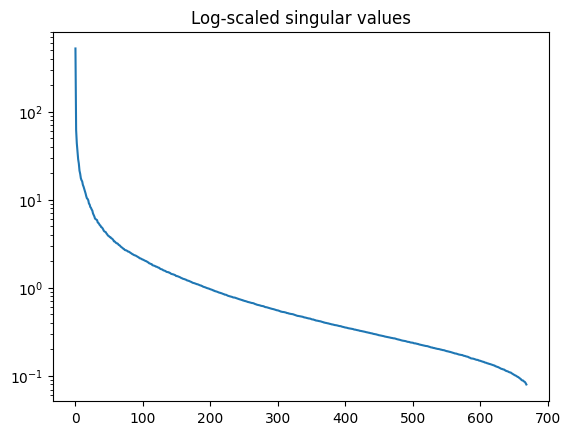

In [16]:
plt.semilogy(values[0])
plt.title('Log-scaled singular values')

Text(0.5, 1.0, "Singular values' CDF")

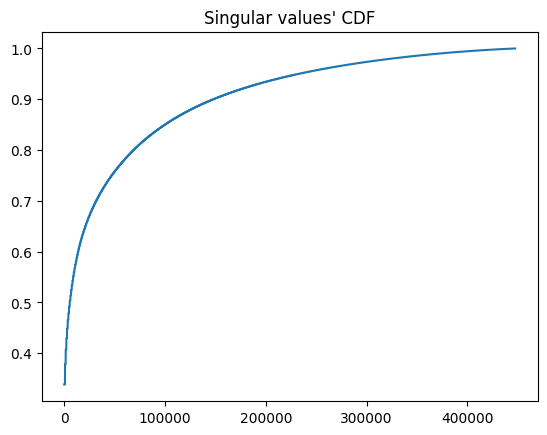

In [17]:
plt.plot(cdfs[0])
plt.title('Singular values\' CDF')